In [1]:
#内置图像，引入R语言
%matplotlib inline
%config InlineBackend.figure_format="svg"
%load_ext rpy2.ipython

In [3]:
%%R
library(TSA)

# 1.前言
   时间序列回归模型主要是在一般的时间序列分析中加入外部信息，提高模型对时间序列的拟合程度，进而产生可靠的预测结果。在具体的建模过程中，将时间序列分成两个部分，一个是无干扰平稳ARIMA过程，一个是干扰项。

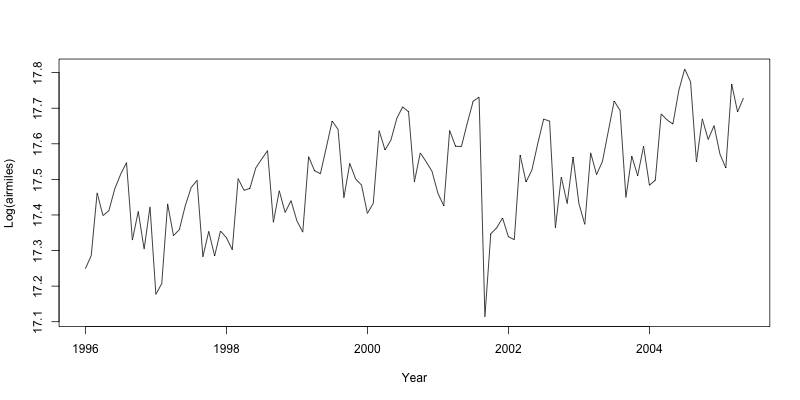

In [4]:
%%R -w 800 -h 400
#以美国航空得每月客运历程为例，分析911事件对航运里程的影响。
data(airmiles)
plot(log(airmiles),ylab = 'Log(airmiles)',xlab = 'Year')

# 2.估计干预模型

干预模型一般采用一个脉冲函数来模拟，时间的发生。
脉冲函数包括长期的干预和短期的干预两大类。

# 3.估计平稳ARIMA模型
对非干预部分通常采用平稳的ARIMA模型来模拟。

# 4.加入干预效应的时间序列回归模型
将以上两个模型合并后，进行参数估计即可。

In [6]:
%%R
air.m1 = arimax(log(airmiles),order=c(0,1,1),seasonal=list(order=c(0,1,1),period=12),
                xtransf=data.frame(I911=1*(seq(airmiles)==69),I911=1*(seq(airmiles)==69)),
                transfer=list(c(0,0),c(1,0)),
                xreg=data.frame(Dec96=1*(seq(airmiles)==84)),
                method='ML')
air.m1


Call:
arimax(x = log(airmiles), order = c(0, 1, 1), seasonal = list(order = c(0, 1, 
    1), period = 12), xreg = data.frame(Dec96 = 1 * (seq(airmiles) == 84)), 
    method = "ML", xtransf = data.frame(I911 = 1 * (seq(airmiles) == 69), I911 = 1 * 
        (seq(airmiles) == 69)), transfer = list(c(0, 0), c(1, 0)))

Coefficients:
          ma1     sma1   Dec96  I911-MA0  I911.1-AR1  I911.1-MA0
      -0.5037  -0.6951  0.0756   -0.1151      0.8554     -0.2514
s.e.   0.0822   0.1478  0.0248    0.0694      0.1536      0.0594

sigma^2 estimated as 0.0009165:  log likelihood = 203.76,  aic = -395.51


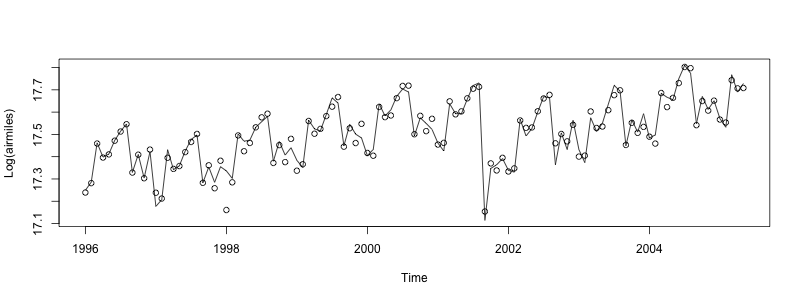

In [7]:
%%R -w 800 -h 300
#拟合数据
plot(log(airmiles),ylab='Log(airmiles)')
points(fitted(air.m1))

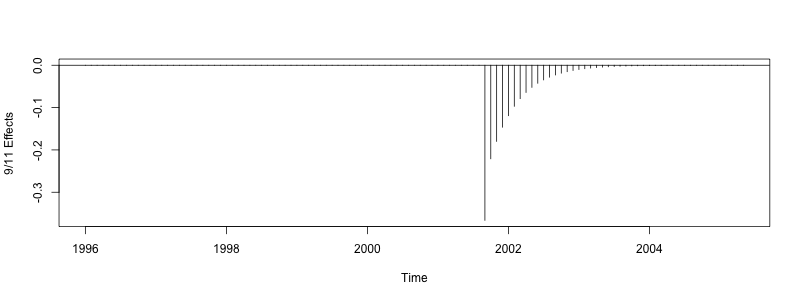

In [8]:
%%R -w 800 -h 300
#判断911时间对航空客运造成的影响的估计
Nine11p=1*(seq(airmiles)==69)
plot(ts(Nine11p*(-0.0949)+filter(Nine11p,filter=.8139,method='recursive',side=1)*(-0.2715),frequency=12,start=1996),
     ylab='9/11 Effects',
     type='h')
abline(h=0)